# Import Libraries

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load Data

In [157]:
df_train = pd.read_csv('C:/Users/10/Downloads/train.csv')
df_test = pd.read_csv('C:/Users/10/Downloads/test.csv')

In [158]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [159]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [160]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [161]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# Data Exploration

# Count missing values in each column

In [162]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [163]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [165]:
null_counts = df.isnull().sum()
non_zero_null_counts = null_counts[null_counts > 0]
non_zero_null_counts = non_zero_null_counts.sort_values()
non_zero_null_counts

Electrical         1
GarageArea         1
GarageCars         1
Exterior1st        1
Exterior2nd        1
KitchenQual        1
SaleType           1
TotalBsmtSF        1
BsmtFinSF1         1
BsmtUnfSF          1
BsmtFinSF2         1
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
MasVnrType      1766
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

<Axes: >

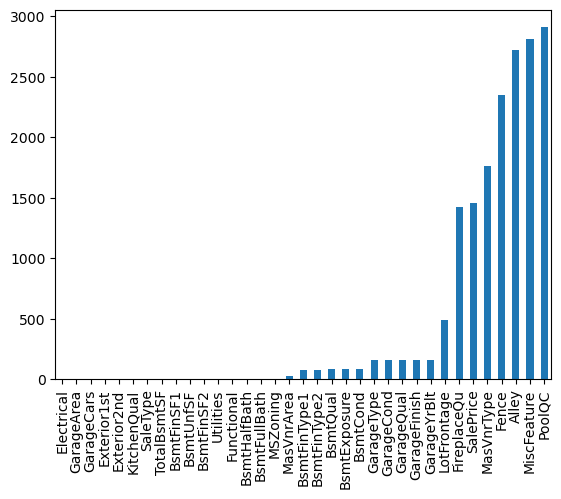

In [166]:
non_zero_null_counts.plot(kind='bar')

# Feature Engineering

Check fields with large missing data from the description:


*   PoolQC means Pool Quality and NA means No Pool (it is not a missing value and it will impact the peroformance). You will notice that values are (Ex	Excellent, Gd	Good, TA	Average/Typical, Fa	Fair, NA	No Pool). The order here make sense
*   Find and replace is the best approach in this case





In [167]:
# create a dictionary use table names and values
df.loc[df['PoolQC'] == 'NA', 'PoolQC'] = 'No Pool'

In [168]:
df['PoolQC'].value_counts()

PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64


*   MiscFeature includes: Elev	Elevator, Gar2	2nd Garage (if not
described in garage section), Othr	Other, Shed	Shed (over 100 SF), TenC	Tennis Court, NA	None
*    Replacing NA with the most frequent term does not make sense here
*    We can use None as a separate category
*    One hot encoding will be a good choice here



In [169]:
df['MiscFeature'] = df['MiscFeature'].replace({'NA': 'None'})
MiscFeature=ce.OneHotEncoder(cols = ["MiscFeature"])
df=MiscFeature.fit_transform(df)

Alley: Type of alley access to property. The field values are defined as:
*   Grvl	Gravel
*   Pave	Paved
*   NA 	No alley access

Similar to MiscFeature, we can use None as a separate category and One hot encoding will be a good choice here

In [170]:
df['Alley'] = df['Alley'].replace({'NA': 'None'})
Alley=ce.OneHotEncoder(cols = ["Alley"])
df=Alley.fit_transform(df)

Fence: Fence quality.  The field values are defined as
*   GdPrv	Good Privacy
*   MnPrv	Minimum Privacy
*   GdWo	Good Wood
*   MnWw	Minimum Wood/Wire
*   NA	No Fence

We will use the above technique      

In [171]:
df['Fence'] = df['Fence'].replace({'NA': 'None'})
Fence=ce.OneHotEncoder(cols = ["Fence"])
df=Fence.fit_transform(df)

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace


We will use find and replace


In [172]:
df['FireplaceQu'] = df['FireplaceQu'].replace({'NA': 'No Fireplace'})

The last item is the lot frontage (واجهة الشارع).Linear feet of street connected to property.


We may use the median in this case


In [173]:
lot_frontage_median = df['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(lot_frontage_median)

In [174]:
# Similarly, we fix GarageCond using find and replace
df['GarageCond'] = df['GarageCond'].replace({'NA': 'No Garage'})

# for GarageType, NA means no garage
df['GarageType'] = df['GarageType'].replace({'NA': 'No Garage'})

# for MasVnrType  Masonry veneer type, None means no Maonry veneer
df['MasVnrType'] = df['MasVnrType'].replace({'NA': 'No Masonry Veneer'})


# for Area, can can use the median
lot_area_median = df['LotArea'].median()
df['LotArea'] = df['LotArea'].fillna(lot_area_median)


# for Electrical, we can use the most frequent label (gets index 0).
electrical_mode = df['Electrical'].mode().iloc[0]
df['Electrical'] = df['Electrical'].fillna(electrical_mode)

In [175]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley_1,Alley_2,Alley_3,LotShape,...,MiscFeature_2,MiscFeature_3,MiscFeature_4,MiscFeature_5,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,0,1,Reg,...,0,0,0,1,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,0,0,1,Reg,...,0,0,0,1,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,0,0,1,IR1,...,0,0,0,1,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,0,0,1,IR1,...,0,0,0,1,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,0,0,1,IR1,...,0,0,0,1,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,0,0,1,Reg,...,0,0,0,1,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,0,0,1,Reg,...,0,0,0,1,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,0,0,1,Reg,...,0,0,0,1,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,0,0,1,Reg,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [176]:
# we completed these with large number of missing values, let's replace

#fill NAN values as well
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = numerical_columns.difference(['GarageYrBlt'])
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

Check missing values one more time

In [177]:
missing_values = df.isnull().sum()
missing_values_nun_zero = missing_values[missing_values > 0]
missing_values_nun_zero

GarageYrBlt    159
dtype: int64

For the GarageYrBlt I will convert it to categorical to show how old the garage

In [178]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 91, dtype: int64

In [183]:
df.drop('Id', axis = 1, inplace = True)

In [184]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley_1,Alley_2,Alley_3,LotShape,LandContour,...,MiscFeature_2,MiscFeature_3,MiscFeature_4,MiscFeature_5,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,0,1,Reg,Lvl,...,0,0,0,1,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,0,0,1,Reg,Lvl,...,0,0,0,1,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,0,0,1,IR1,Lvl,...,0,0,0,1,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,0,0,1,IR1,Lvl,...,0,0,0,1,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,0,0,1,IR1,Lvl,...,0,0,0,1,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,0,0,1,Reg,Lvl,...,0,0,0,1,0,6,2006,WD,Normal,163000.0
2915,160,RM,21.0,1894,Pave,0,0,1,Reg,Lvl,...,0,0,0,1,0,4,2006,WD,Abnorml,163000.0
2916,20,RL,160.0,20000,Pave,0,0,1,Reg,Lvl,...,0,0,0,1,0,9,2006,WD,Abnorml,163000.0
2917,85,RL,62.0,10441,Pave,0,0,1,Reg,Lvl,...,0,0,0,0,700,7,2006,WD,Normal,163000.0


We can do similar analysis to transform other features such as HeatingQC, ExterQual, etc. (try it yourself)

# Missing data test



In [185]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 90, dtype: int64

In [186]:
df.loc[0, 'Exterior1st'] = pd.NA
df.loc[1, 'Exterior2nd'] = pd.NA
df.loc[2, 'BsmtFinSF1'] = pd.NA
df.loc[0, 'Utilities'] = pd.NA
df.loc[1, 'Utilities'] = pd.NA
df.loc[0, 'BsmtFullBath'] = pd.NA
df.loc[1, 'BsmtFullBath'] = pd.NA
df.loc[0, 'MSZoning'] = pd.NA
df.loc[1, 'MSZoning'] = pd.NA
df.loc[2, 'MSZoning'] = pd.NA
df.loc[3, 'MSZoning'] = pd.NA

# Count missing values
missing_values = df.isnull().sum()

print(missing_values)

MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 90, dtype: int64


# Encoding

In [187]:
df = df.dropna(subset=['MSZoning'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley_1,Alley_2,Alley_3,LotShape,LandContour,...,MiscFeature_2,MiscFeature_3,MiscFeature_4,MiscFeature_5,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
4,60,RL,84.0,14260,Pave,0,0,1,IR1,Lvl,...,0,0,0,1,0,12,2008,WD,Normal,250000.0
5,50,RL,85.0,14115,Pave,0,0,1,IR1,Lvl,...,0,0,0,0,700,10,2009,WD,Normal,143000.0
6,20,RL,75.0,10084,Pave,0,0,1,Reg,Lvl,...,0,0,0,1,0,8,2007,WD,Normal,307000.0
7,60,RL,68.0,10382,Pave,0,0,1,IR1,Lvl,...,0,0,0,0,350,11,2009,WD,Normal,200000.0
8,50,RM,51.0,6120,Pave,0,0,1,Reg,Lvl,...,0,0,0,1,0,4,2008,WD,Abnorml,129900.0


In [188]:
col = df.columns
col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley_1',
       'Alley_2', 'Alley_3', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Garage

In [189]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels
#df['type']= label_encoder.fit_transform(df['type'])
for i in col:
    df[i]= label_encoder.fit_transform(df[i])
df.head()

C:\Users\10\AppData\Local\Temp\ipykernel_17468\789804521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]= label_encoder.fit_transform(df[i])
C:\Users\10\AppData\Local\Temp\ipykernel_17468\789804521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]= label_encoder.fit_transform(df[i])
C:\Users\10\AppData\Local\Temp\ipykernel_17468\789804521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley_1,Alley_2,Alley_3,LotShape,LandContour,...,MiscFeature_2,MiscFeature_3,MiscFeature_4,MiscFeature_5,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
4,5,3,60,1669,1,0,0,1,0,3,...,0,0,0,1,0,11,2,8,4,492
5,4,3,61,1649,1,0,0,1,0,3,...,0,0,0,0,17,9,3,8,4,203
6,0,3,51,1001,1,0,0,1,3,3,...,0,0,0,1,0,7,1,8,4,571
7,5,3,44,1073,1,0,0,1,0,3,...,0,0,0,0,4,10,3,8,4,389
8,4,4,27,251,1,0,0,1,3,3,...,0,0,0,1,0,3,2,8,0,151


# First Model

In [190]:
LR_model = LinearRegression()

In [191]:
x = df.drop(columns = ['SalePrice'])
y = df.SalePrice

In [192]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 30)

In [193]:
print("X_train Shape = " , x_train.shape)
print("Y_train Shape = " , y_train.shape)
print("X_test Shape = " , x_test.shape)
print("Y_test Shape = " , y_test.shape)

X_train Shape =  (2332, 89)
Y_train Shape =  (2332,)
X_test Shape =  (583, 89)
Y_test Shape =  (583,)


In [194]:
LR_model.fit(x_train , y_train)

LinearRegression()

In [195]:
y_pred = LR_model.predict(x_test)

In [196]:
y_pred

array([330.93342514, 165.92657293, 255.4873705 , 193.72696435,
       232.78963387, 245.36777548, 224.24996722, 416.37816808,
       367.1312435 , 188.64335097, 424.14589625, 401.12787511,
       362.11964621, 327.34423963, 375.70465121, 196.28983335,
       181.31475803, 262.41634999, 237.99170427, 388.79506057,
       365.84232495, 344.60228422, 365.49146093, 260.34863749,
       252.79727266, 270.08147864, 229.06517738, 332.55340047,
       449.22129237, 230.09335668, 327.30313864, 210.12707239,
       249.19180398, 383.74386319, 268.64234934, 271.70779192,
       408.89864186, 322.13297834, 390.25819034, 246.89294465,
       393.43979846, 238.00982914, 117.26584645, 315.2947868 ,
       179.3894402 , 265.52969916, 255.77824154, 382.51721182,
       221.41040933, 208.27310231, 291.65632725, 263.63783933,
       485.32601743, 522.46074893, 451.80288771, 220.42004901,
       191.1610428 , 181.77690971, 146.97062806, 340.23140923,
       288.29715579, 301.4890877 , 135.82503532, 170.58

In [197]:
#MAE
print("MAE = " , mean_absolute_error(y_test, y_pred))

MAE =  75.63364565417386


In [198]:
#MSE
print("MSE = " , mean_squared_error(y_test, y_pred))

MSE =  8318.264060716148


In [199]:
#RMSE
print("RMSE = " , np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE =  91.20451776483524


In [200]:
#R2 Square Error
print("R2 Square Error = " , r2_score(y_test, y_pred))

R2 Square Error =  0.34448710070496913
